# **IMPORT STATEMENTS**

In [98]:
#IMPORT STATEMENTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **LOAD THE DATASET**

In [99]:
df=pd.read_csv("/kaggle/input/ibm-transactions-for-anti-money-laundering-aml/HI-Small_Trans.csv")

In [100]:
df.head(5)

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:20,10,8000EBD30,10,8000EBD30,3697.34,US Dollar,3697.34,US Dollar,Reinvestment,0
1,2022/09/01 00:20,3208,8000F4580,1,8000F5340,0.01,US Dollar,0.01,US Dollar,Cheque,0
2,2022/09/01 00:00,3209,8000F4670,3209,8000F4670,14675.57,US Dollar,14675.57,US Dollar,Reinvestment,0
3,2022/09/01 00:02,12,8000F5030,12,8000F5030,2806.97,US Dollar,2806.97,US Dollar,Reinvestment,0
4,2022/09/01 00:06,10,8000F5200,10,8000F5200,36682.97,US Dollar,36682.97,US Dollar,Reinvestment,0


In [101]:
df.shape

(5078345, 11)

# **Check For Null Values**

In [102]:
df.isna().sum()

Timestamp             0
From Bank             0
Account               0
To Bank               0
Account.1             0
Amount Received       0
Receiving Currency    0
Amount Paid           0
Payment Currency      0
Payment Format        0
Is Laundering         0
dtype: int64

# **Check for Duplicates**

In [103]:
df.duplicated().sum()

9

In [104]:
df.drop_duplicates(inplace=True)

# **Check if the two columns are equal**

In [105]:
result = (df["Amount Received"] == df["Amount Paid"]).all()
print(result)

False


In [106]:
result = (df["Receiving Currency"] == df["Payment Currency"]).all()
print(result)

False


In [107]:
result = set(df["Receiving Currency"].unique()) ==set(df["Payment Currency"].unique())
print(result)

True


# **Check the dataset is balanced or not**

In [108]:
df["Is Laundering"].unique()

array([0, 1])

In [109]:
df["Is Laundering"].value_counts()

Is Laundering
0    5073159
1       5177
Name: count, dtype: int64

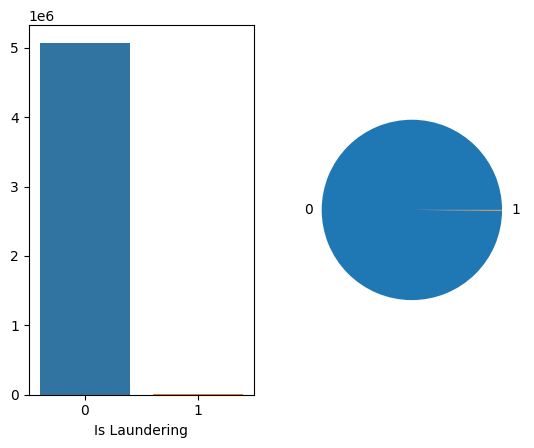

In [110]:
target_count=df["Is Laundering"].value_counts()
plt.subplot(1,2,1)
sns.barplot(x=target_count.index,y=target_count.values)
plt.subplot(1,2,2)
plt.pie(target_count.values,labels=target_count.index);

# **Dealing with Date**

In [111]:
df.head(1)

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:20,10,8000EBD30,10,8000EBD30,3697.34,US Dollar,3697.34,US Dollar,Reinvestment,0


In [112]:
# Convert the "Timestamp" column to datetime format
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

# Extract Date, Day, and Time from the Timestamp
df["Date"] = df["Timestamp"].dt.date
df["Day"] = df["Timestamp"].dt.day_name()
df["Time"] = df["Timestamp"].dt.time                                              

df.drop(columns=["Timestamp"], inplace=True)

In [113]:
df.head(1)

,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,Date,Day,Time
0,10,8000EBD30,10,8000EBD30,3697.34,US Dollar,3697.34,US Dollar,Reinvestment,0,2022-09-01,Thursday,00:20:00


# **Date Time with Money Laundering**

<Axes: title={'center': 'Days with Money Laundering'}, xlabel='Day'>

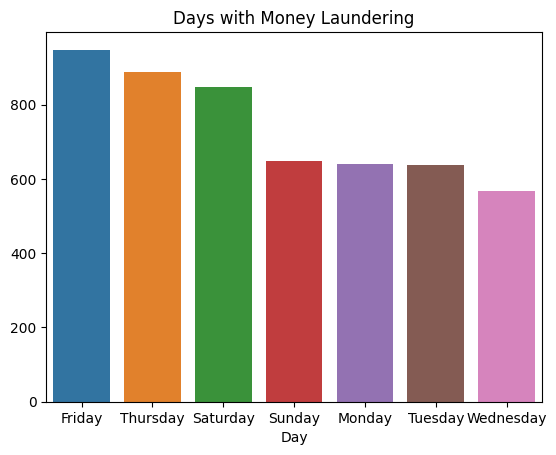

In [114]:
plt.title("Days with Money Laundering")
day=df[df["Is Laundering"]==1]["Day"].value_counts()
sns.barplot(x=day.index,y=day.values)

In [125]:
contingency = pd.crosstab(df['Is Laundering'], df['Day'])
import scipy.stats as st
x,p,y,z = st.chi2_contingency(contingency)

if p < 0.05:
    print("There is a relationship")
else:
    print("There is no relationship")         

There is a relationship


In [126]:
contingency = pd.crosstab(df['Is Laundering'], df['Date'])
import scipy.stats as st
x,p,y,z = st.chi2_contingency(contingency)

if p < 0.05:
    print("There is a relationship")
else:
    print("There is no relationship")

There is a relationship


In [127]:
contingency = pd.crosstab(df['Is Laundering'], df['Time'])
import scipy.stats as st
x,p,y,z = st.chi2_contingency(contingency)

if p < 0.05:
    print("There is a relationship")
else:
    print("There is no relationship")

There is a relationship


# **Payment Format of Money Laundering Cases**

In [117]:
df["Payment Format"].unique()

array(['Reinvestment', 'Cheque', 'Credit Card', 'ACH', 'Cash', 'Wire',
       'Bitcoin'], dtype=object)

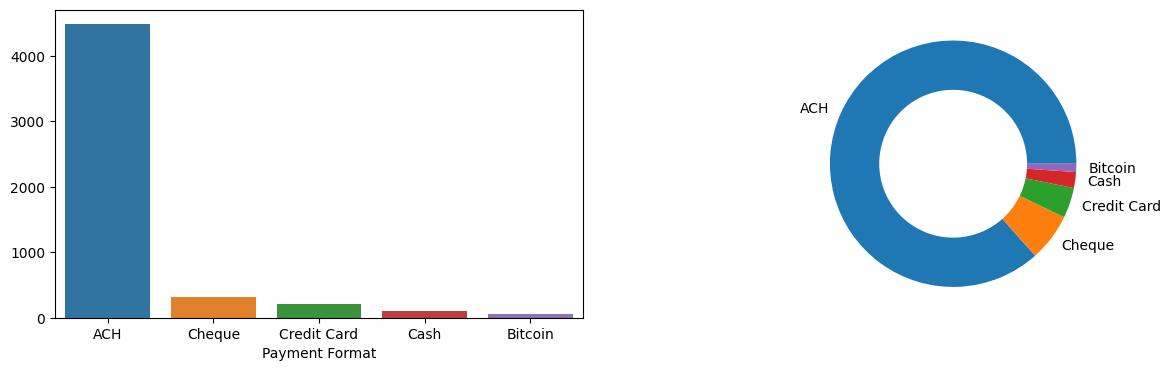

In [118]:
payment_format=df[df["Is Laundering"]==1]["Payment Format"].value_counts()

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.barplot(x=payment_format.index,y=payment_format.values)

plt.subplot(1,2,2)
plt.pie(payment_format.values,labels=payment_format.index,wedgeprops=dict(width=0.4)); #use semicolon to avoid texts in O/P

# **Currency Used in Money Laundering Cases**

In [119]:
df["Receiving Currency"].unique()

array(['US Dollar', 'Bitcoin', 'Euro', 'Australian Dollar', 'Yuan',
       'Rupee', 'Mexican Peso', 'Yen', 'UK Pound', 'Ruble',
       'Canadian Dollar', 'Swiss Franc', 'Brazil Real', 'Saudi Riyal',
       'Shekel'], dtype=object)

In [120]:
df["Payment Currency"].unique()

array(['US Dollar', 'Bitcoin', 'Euro', 'Australian Dollar', 'Yuan',
       'Rupee', 'Yen', 'Mexican Peso', 'UK Pound', 'Ruble',
       'Canadian Dollar', 'Swiss Franc', 'Brazil Real', 'Saudi Riyal',
       'Shekel'], dtype=object)

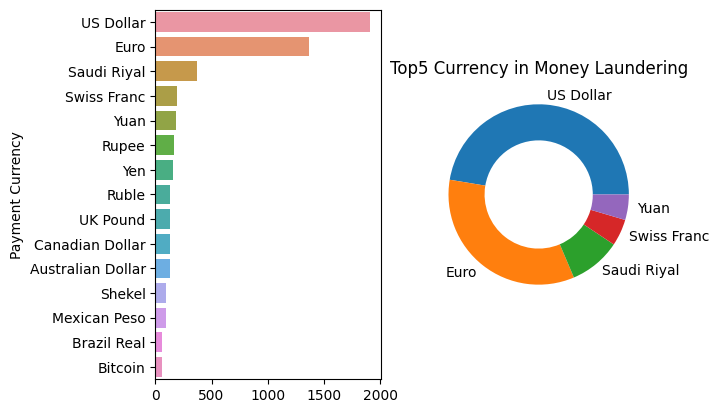

In [121]:
currency=df[df["Is Laundering"]==1]["Payment Currency"].value_counts()
plt.subplot(1,2,1)
#plt.figure(figsize=(5,5))
sns.barplot(y=currency.index,x=currency.values)
plt.subplot(1,2,2)
currency=currency.head()
plt.title("Top5 Currency in Money Laundering")
plt.pie(currency.values,labels=currency.index,wedgeprops=dict(width=0.4));

<Axes: xlabel='From Bank'>

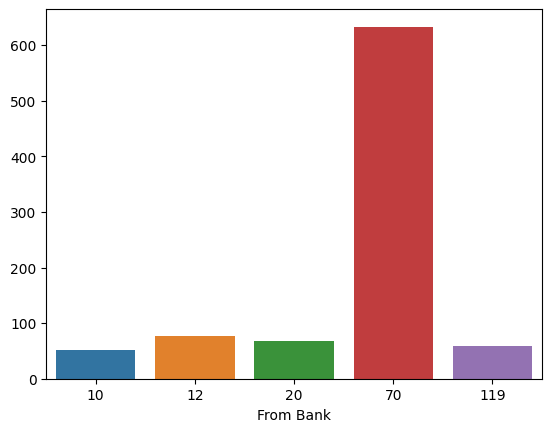

In [122]:
from_bank=df[df["Is Laundering"]==1]["From Bank"].value_counts().head()
sns.barplot(x=from_bank.index,y=from_bank.values)

# **CORELATION MATRIX**

<Axes: >

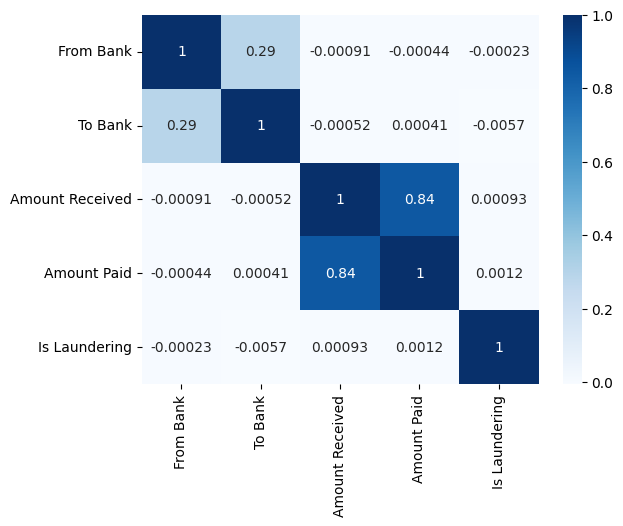

In [124]:
cr=df.corr(numeric_only=True)
sns.heatmap(cr,annot=True,cmap="Blues")